In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
from dateutil.parser import parse
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
######################################
#    DOWNLOAD DATA
######################################

# https://drive.google.com/drive/folders/1Xt9EcMG64I_2y_fxu4d5Zr-qo2VlwiOP?usp=sharing

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
details = pd.read_csv('data/movie_detials.csv')

In [5]:
data

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id
0,0,30,2173336,5,2004-06-22,2003,Something's Gotta Give,538 days,s8056
1,1,30,2473170,5,2004-05-22,2003,Something's Gotta Give,507 days,s8056
2,2,30,900816,3,2005-07-08,2003,Something's Gotta Give,919 days,s8056
3,3,30,1990901,4,2004-05-24,2003,Something's Gotta Give,509 days,s8056
4,4,30,662337,4,2005-07-08,2003,Something's Gotta Give,919 days,s8056
...,...,...,...,...,...,...,...,...,...
14111282,14394810,17725,2526746,4,2005-03-09,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2259 days,s5057
14111283,14394811,17725,77915,1,2005-03-14,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2264 days,s5057
14111284,14394812,17725,2180413,2,2005-09-12,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2446 days,s5057
14111285,14394813,17725,1292639,1,2005-09-30,1999,Jerry Seinfeld: I'm Telling You for the Last Time,2464 days,s5057


In [6]:
details

,Unnamed: 0,show_id,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s8056,Something's Gotta Give,Nancy Meyers,"Jack Nicholson, Diane Keaton, Keanu Reeves, Fr...",United States,"August 1, 2019",2003,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine..."
1,118413,s6642,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,PG-13,103 min,"Action & Adventure, Sci-Fi & Fantasy",In ancient times when majestic fire-breathers ...
2,135818,s568,Congo,Frank Marshall,"Dylan Walsh, Laura Linney, Ernie Hudson, Tim C...",United States,"July 1, 2021",1995,PG-13,108 min,"Action & Adventure, Thrillers","Eight people, some with ulterior motives, go o..."
3,149416,s601,The Game,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,"July 1, 2021",1997,R,129 min,Thrillers,An aloof investment banker's life spirals into...
4,187778,s8111,Stuart Little 2,Rob Minkoff,"Michael J. Fox, Geena Davis, Hugh Laurie, Jona...",United States,"January 1, 2020",2002,PG,78 min,"Children & Family Movies, Comedies",Zany misadventures are in store as lovable cit...
...,...,...,...,...,...,...,...,...,...,...,...,...
585,14365233,s1442,Hello Brother,Sohail Khan,"Salman Khan, Arbaaz Khan, Rani Mukerji, Johny ...",India,"January 4, 2021",1999,TV-14,126 min,"Action & Adventure, Comedies, International Mo...",After receiving a heart transplant from a murd...
586,14365322,s7580,New York Minute,Dennie Gordon,"Mary-Kate Olsen, Ashley Olsen, Eugene Levy, An...",United States,"January 1, 2020",2004,PG,91 min,"Children & Family Movies, Comedies",When bickering teenage twins accidentally land...
587,14378240,s8395,The Little Mermaid,"Blake Harris, Chris Bouchard","William Moseley, Poppy Drayton, Loreto Peralta...",United States,"December 1, 2018",2018,PG,85 min,"Children & Family Movies, Dramas","In this take on the classic tale, a captive ci..."
588,14385226,s2197,Redemption,Mickey Fonseca,"Gil Alexandre, Arlete Bombe, Rashid Abdul, Laq...",Mozambique,"July 29, 2020",2019,TV-MA,102 min,"Dramas, International Movies, Thrillers","Newly released from prison, a man returning to..."


## Plots

#### Basic

- Number of movies per release date
- Number of ratings per movie
- Average ratings per movie

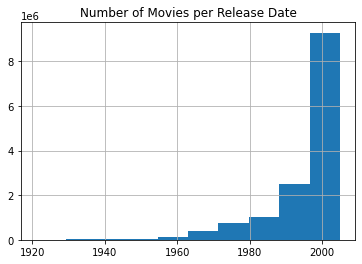

In [7]:
data['Released Date'].hist()
plt.title("Number of Movies per Release Date")
plt.show()

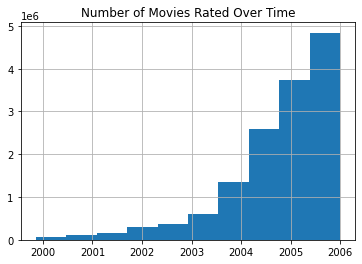

In [8]:
pd.to_datetime(data['Rated Date']).hist()
plt.title("Number of Movies Rated Over Time")
plt.show()

In [9]:
#datee = data['Rated Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
temp = data
temp['month'] = data['Rated Date'].apply(lambda x: x.split('-')[1])
temp['day_of_month'] = data['Rated Date'].apply(lambda x: x.split('-')[2])
temp['year'] = data['Rated Date'].apply(lambda x: x.split('-')[0])
temp.head()

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id,month,day_of_month,year
0,0,30,2173336,5,2004-06-22,2003,Something's Gotta Give,538 days,s8056,06,22,2004
1,1,30,2473170,5,2004-05-22,2003,Something's Gotta Give,507 days,s8056,05,22,2004
2,2,30,900816,3,2005-07-08,2003,Something's Gotta Give,919 days,s8056,07,08,2005
3,3,30,1990901,4,2004-05-24,2003,Something's Gotta Give,509 days,s8056,05,24,2004
4,4,30,662337,4,2005-07-08,2003,Something's Gotta Give,919 days,s8056,07,08,2005


In [10]:
# temp['month'].hist(bins = 20)
# plt.title("Number of Movies Ratings per Month")
# plt.show()

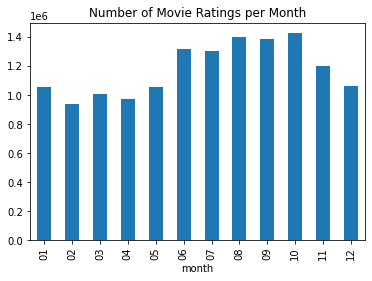

In [11]:
temp.groupby('month')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per Month")
plt.show()

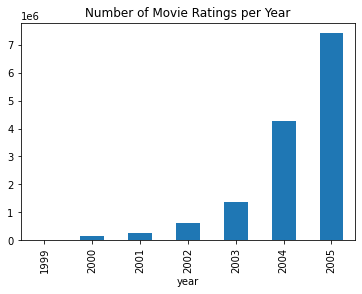

In [12]:
temp.groupby('year')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per Year")
plt.show()

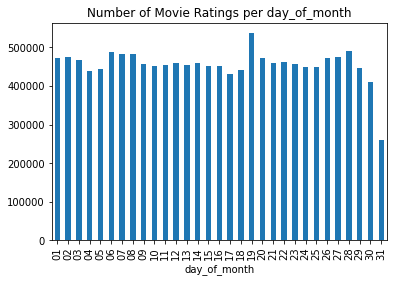

In [13]:
temp.groupby('day_of_month')['Rating'].count().plot.bar()
plt.title("Number of Movie Ratings per day_of_month")
plt.show()

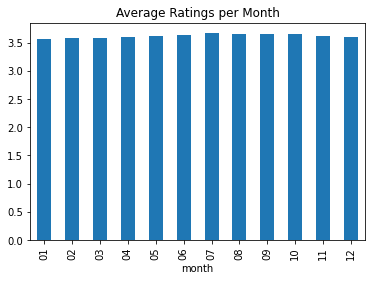

In [14]:
temp.groupby('month')['Rating'].mean().plot.bar()
plt.title("Average Ratings per Month")
plt.show()

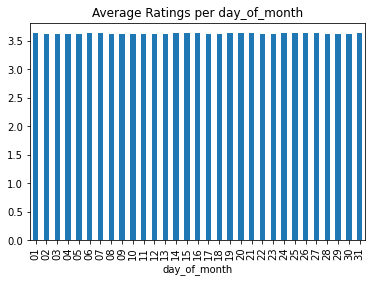

In [15]:
temp.groupby('day_of_month')['Rating'].mean().plot.bar()
plt.title("Average Ratings per day_of_month")
plt.show()

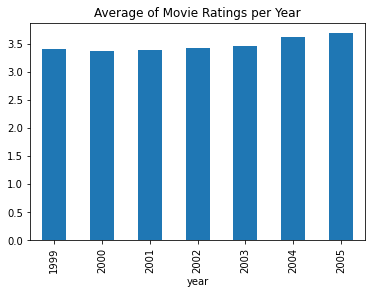

In [16]:
temp.groupby('year')['Rating'].mean().plot.bar()
plt.title("Average of Movie Ratings per Year")
plt.show()

In [17]:
word_to_ix = {}
num_unique_words = 0
for d in details['Title']:
    sent = d.split()
    for word in sent:
        word = word.lower()
        if word not in word_to_ix:
            word_to_ix[word] = 1
            num_unique_words += 1
        else:
            word_to_ix[word] = word_to_ix[word] + 1

In [18]:
d =sorted(word_to_ix.items(), reverse=True, key=lambda kv: kv[1])
#import collections
#sorted_dict = collections.OrderedDict(sorted_x)
d

[('the', 144),
 ('of', 34),
 ('in', 21),
 ('a', 19),
 ('and', 12),
 ('2', 10),
 ('american', 10),
 ('little', 8),
 ('love', 7),
 ('&', 6),
 ('dil', 6),
 ('hai', 6),
 ('day', 6),
 ('house', 6),
 ('to', 6),
 ('time', 6),
 ('night', 6),
 ('on', 5),
 ('rocky', 5),
 ('for', 5),
 ('my', 5),
 ('jones', 5),
 ('me', 5),
 ('girl', 4),
 ('kid', 4),
 ('movie', 4),
 ('men', 4),
 ('spy', 4),
 ('monster', 4),
 ('black', 4),
 ('ii', 4),
 ('last', 4),
 ('party', 4),
 ('an', 4),
 ('one', 4),
 ('tremors', 3),
 ('boy', 3),
 ('jaws', 3),
 ('run', 3),
 ('na', 3),
 ('good', 3),
 ('four', 3),
 ('mystery', 3),
 ('3', 3),
 ('kids', 3),
 ('island', 3),
 ('dreams', 3),
 ('mirror', 3),
 ('ninja', 3),
 ('wild', 3),
 ('west', 3),
 ('what', 3),
 ('do', 3),
 ('sam', 3),
 ('blue', 3),
 ('you', 3),
 ('3:', 3),
 ('austin', 3),
 ('thing', 3),
 ('money', 3),
 ('river', 3),
 ('balto', 3),
 ('new', 3),
 ('stuart', 2),
 ('legend', 2),
 ('flintstones', 2),
 ('vegas', 2),
 ('kill', 2),
 ('bill:', 2),
 ('vol.', 2),
 ('genius', 2

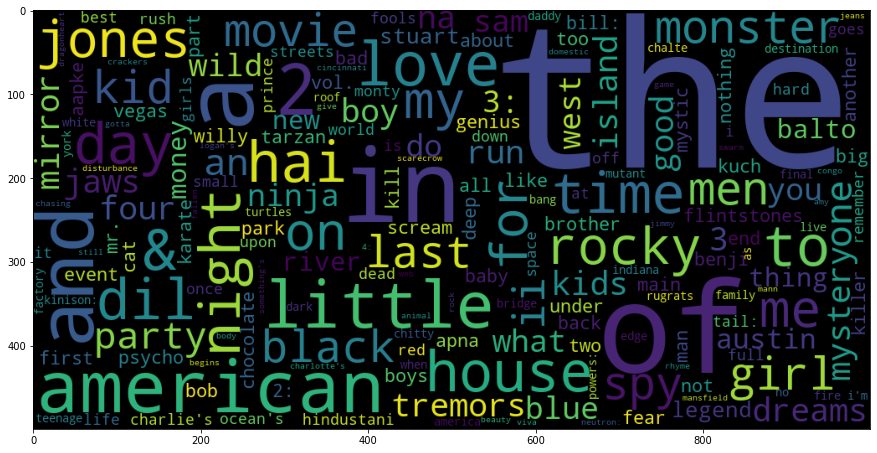

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_to_ix)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# TODO : wordcloud for movie description ?
# TODO : EDA for director, cast, country, date_added, release_year, rating, duration, listed_in, description

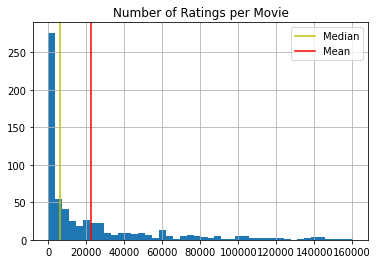

Mean nubmer of rating: 22257.55047318612
Median nubmer of rating: 6015.5
Min number of rating: 27
Max number of rating: 160326


In [20]:
n = 4499

ratings = data.groupby('MovieID').count()['Rating']
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Number of Ratings per Movie")
plt.legend()

plt.show()

print("Mean nubmer of rating:", ratings.mean())
print("Median nubmer of rating:", ratings.median())
print("Min number of rating:", ratings.min())
print("Max number of rating:", ratings.max())

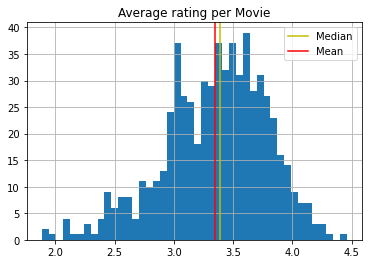

Mean rating: 3.348061439974692
Median rating: 3.393556930750974
Min rating: 1.8877551020408163
Max rating: 4.458004172392996


In [21]:
n = 4499

ratings = data.groupby('MovieID')['Rating'].mean()
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Average rating per Movie")
plt.legend()

plt.show()

print("Mean rating:", ratings.mean())
print("Median rating:", ratings.median())
print("Min rating:", ratings.min())
print("Max rating:", ratings.max())

### Insightful


#### Average and number of ratings per release date 
- Are movies released more recently more likely to recieve better ratings?
- See some trends throughout date.

#### Rating trend of movies.
- How do ratings change across time?
- Plot average rating since release date.


### ToDO
#### Word - Embeddings to Ratings
- Which movie titles contain words that are more significant to viewers?
- Extract words that correlate with better ratings.


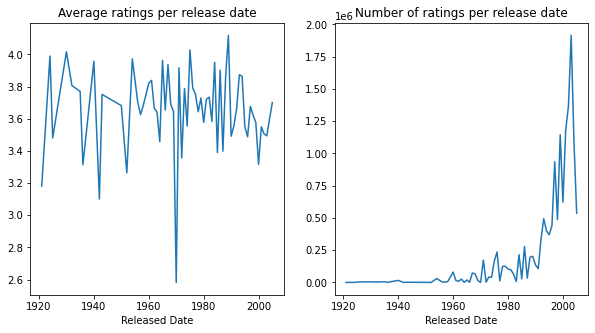

In [22]:
# Average and number of ratings per release date
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby('Released Date')['Rating'].mean().plot(ax=axs[0])
axs[0].set_title('Average ratings per release date')
data.groupby('Released Date')['Rating'].count().plot(ax=axs[1])
axs[1].set_title('Number of ratings per release date')

plt.show()

# **** NEW ****

In [23]:
data['Released Since'] = pd.to_datetime(data['Rated Date']) - pd.to_datetime(data['Released Date'], format='%Y')

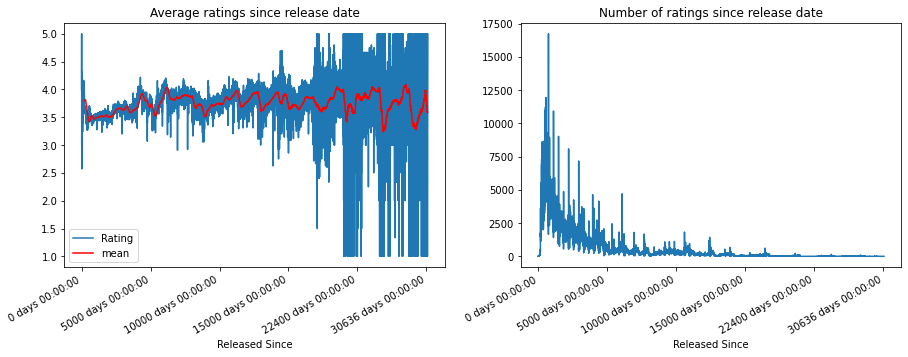

In [24]:
# Average and number of ratings per release date
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

temp = data

#temp['days'] = temp['Released Since'].apply(lambda x: int(''.join(c for c in x if c.isdigit())))

temp.groupby('Released Since')['Rating'].mean().plot(ax=axs[0])
                                            
rating_average = temp.groupby('Released Since')['Rating'].mean().rolling(window=250).mean()
axs[0].plot(rating_average.values, 'r-', label='mean')
axs[0].legend()
axs[0].set_title('Average ratings since release date')

temp.groupby('Released Since')['Rating'].count().plot(ax=axs[1])
axs[1].set_title('Number of ratings since release date')

plt.show()

# * NOTE * 5% (70,5564/14,111,287) of data is used below since Data has 14M rows to reduce runtimes/failures

# Baseline 1

In [7]:
from tqdm import tqdm

In [8]:
def mae(pred, true):
    return np.mean(np.abs(pred - true))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

seed = 20
#working with half to reduce runtimes/failures
small = data.sample(frac=0.05, replace=False, random_state=seed)


# 60 / 20 / 20 split
X_train, X_test, y_train, y_test = train_test_split(small,
                    small.Rating, test_size=0.4, random_state=seed)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                   test_size=0.5, random_state=seed)

In [10]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((423338, 9), (141113, 9), (141113, 9), (423338,), (141113,), (141113,))

In [51]:
#baseline 1
global_mean = X_train.Rating.mean()
y_pred1 = [global_mean for _ in y_valid]
mse1 = mse(y_valid, y_pred1)
mae1 = mae(y_valid, y_pred1)
print("Global mean MSE:" + str(mse1))
print("Global mean MAE:" + str(mae1))

Global mean MSE:1.1129115025241003
Global mean MAE:0.8810598653527241


# Baseline 2

In [32]:
#baseline2
ratings_per_user = defaultdict(list)
ratings_per_movie = defaultdict(list)
movies_per_user= defaultdict(set)
users_per_movie = defaultdict(set)
for ind, row in tqdm(X_train.iterrows(), total=X_train.shape[0]):
    ratings_per_user[row.UserID].append(row.Rating)
    ratings_per_movie[row.MovieID].append(row.Rating)
    movies_per_user[row.UserID].add(row.MovieID)
    users_per_movie[row.MovieID].add(row.UserID)

100%|██████████████████████████████████████████| 423338/423338 [00:22<00:00, 19126.10it/s]


In [33]:
avg_user_rating = {u: (sum(ratings_per_user[u])/len(ratings_per_user[u]))
    if len(ratings_per_user[u]) > 0 else 0 for u in ratings_per_user}

In [34]:
avg_ratings_per_user = {}
for u in ratings_per_user:
    avg_ratings_per_user[u] = np.mean(ratings_per_user[u])

In [46]:
dev_per_user = {u: (sum(ratings_per_user[u])/len(ratings_per_user[u])) - global_mean
    if len(ratings_per_user[u]) > 0 else 0 for u in ratings_per_user}

dev_per_movie = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) - global_mean 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}

def baseline_2(row):
    movie = row.MovieID
    user = row.UserID
    out = global_mean
    if user in dev_per_user.keys():
        out += dev_per_user[user]
    if movie in dev_per_movie.keys():
        out += dev_per_movie[movie]
    return out

y_pred2 = []
for ind, row in X_valid.iterrows():
    y_pred2.append(baseline_2(row))

mse2 = mse(y_valid, y_pred2)

mae2 = mae(y_valid, y_pred2)
print("Global mean with user/movie deviations MSE:" + str(mse2))
print("Global mean with user/movie deviations MAE:" + str(mae2))
# Global mean with user/movie deviations MSE:0.446983340249063

Global mean with user/movie deviations MSE:1.2384769690381705
Global mean with user/movie deviations MAE:0.867224829933108


In [54]:
# Global mean with user/movie deviations MSE:1.2384769690381705
# Global mean with user/movie deviations MAE:0.867224829933108

# The extra deviation information makes it worse for MSE but not for MAE. 
# This probably that for each user, on average, their ratings deviate more from the mean than not.

In [56]:
# Idea
# We should hae less weight on the ratings that deviate more.
# weight = np.abs(np.max(0, dev_per_user[user]))
# out += weight * normal.pdf(mu=0, sig=1) # change mu and sig

# if value is say 5, then normal.pdf(0, 1)(5) = small number, so weight less.

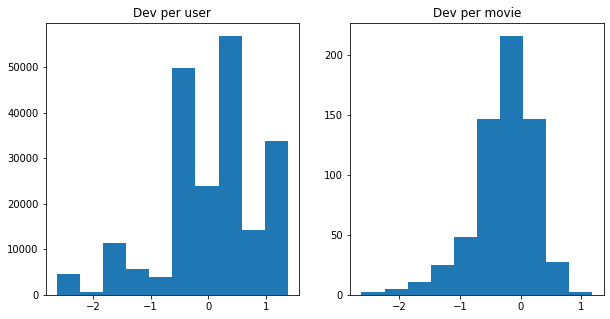

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(dev_per_user.values())
axs[0].set_title('Dev per user')
axs[1].hist(dev_per_movie.values())
axs[1].set_title('Dev per movie')
plt.show()

# Baseline 3

In [58]:
mean_per_movie = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}

mean_per_user = {m: (sum(ratings_per_movie[m])/len(ratings_per_movie[m])) 
    if len(ratings_per_movie[m]) > 0 else 0 for m in ratings_per_movie}



def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

max_sims = []

def predict_rating(row,thresh):
    ratings = []
    sims = []
    max_sim = 0
    movie = row.MovieID
    user = row.UserID
    rating = row.Rating
    for m in movies_per_user[user]:
        if m == movie: continue
        ratings.append(row.Rating - mean_per_movie[m])
        sim = Jaccard(users_per_movie[movie],users_per_movie[m])
        if sim > max_sim:
            max_sim = sim
            
        sims.append(sim)
    max_sims.append(max_sim)
    if (max_sim > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,sims)]
        return mean_per_movie[movie]  + sum(weightedRatings) / sum(sims)
    else:
        return baseline_2(row) #global_mean

#for tresh in np.arange(0, 2, .005):
tresh = 0.000
y_pred3 = [predict_rating(row,tresh) for ind, row in tqdm(X_valid.iterrows(), total=X_valid.shape[0], position=0)]
mse3 = mse(y_valid, y_pred3)
mae3 = mae(y_valid, y_pred3)
print(f"User similarity (tresh = {tresh}) baseline MSE:" + str(mse3))
print(f"User similarity (tresh = {tresh}) baseline MAE:" + str(mae3))



100%|███████████████████████████████████████████| 141113/141113 [00:53<00:00, 2622.08it/s]

User similarity (tresh = 0.0) baseline MSE:0.3974873386548362
User similarity (tresh = 0.0) baseline MAE:0.45044394313697705


In [ ]:
# NEW
# User similarity (tresh = 0.0) baseline MSE:0.3974873386548362
# User similarity (tresh = 0.0) baseline MAE:0.45044394313697705

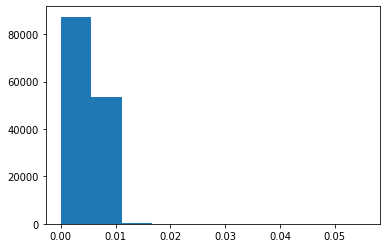

In [59]:
# we tried setting multiple thresholds but 0 performs best.
# * best threshold exactly at 0 (0.002, 0.0002 perform worse) because the dataset is sparse.
# if there are some user similarities, it is produces significant results.
plt.hist(max_sims)
plt.show()

# Baseline 4

### **only 1 change from baseline 3 ** Somehow mean_per_movie[movie] - dev_per_movie makes a significant difference not sure how to interpert this

In [65]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

def predict_rating(row,thresh):
    ratings = []
    sims = []
    max_sim = 0
    movie = row.MovieID
    user = row.UserID
    rating = row.Rating
    for m in movies_per_user[user]:
        if m == movie: continue
        ratings.append(row.Rating - mean_per_movie[m])
        sim = Jaccard(users_per_movie[movie],users_per_movie[m])
        if sim > max_sim:
            max_sim = sim
            
        sims.append(sim)

    if (max_sim > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,sims)]
        return mean_per_movie[movie] - dev_per_movie[movie] + sum(weightedRatings) / sum(sims)
    else:
        return baseline_2(row) #global_mean


tresh = 0.000
y_pred3 = [predict_rating(row,tresh) for ind, row in tqdm(X_valid.iterrows(), total=X_valid.shape[0], position=0)]
mse3 = mse(y_valid, y_pred3)
mae3 = mae(y_valid, y_pred3)
print(f"User similarity (tresh = {tresh}) baseline MSE:" + str(mse3))
print(f"User similarity (tresh = {tresh}) baseline MAE:" + str(mae3))

100%|███████████████████████████████████████████| 141113/141113 [00:53<00:00, 2657.59it/s]


User similarity (tresh = 0.0) baseline MSE:0.3240462108786994
User similarity (tresh = 0.0) baseline MAE:0.36002929990697086


In [66]:
# NEW
# User similarity (tresh = 0.0) baseline MSE:0.3240462108786994
# User similarity (tresh = 0.0) baseline MAE:0.36002929990697086

# Maybe on the report we can bullshit that we need to subtract the deviation.

### 11/28 7:30AM - added
### Temporal Models

# Baseline 5

1. Moving average window by movie.

In [ ]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
import pickle

In [69]:
X_train.head()

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id,month,day_of_month,year
6328647,6552913,8669,552382,4,2005-08-08,1996,Executive Decision,3507 days,s6720,08,08,2005
5754832,5858377,7509,374423,3,2003-10-22,2002,Die Another Day,659 days,s6610,10,22,2003
8914216,9177702,11781,2207196,4,2004-01-02,1984,Indiana Jones and the Temple of Doom,7306 days,s7074,01,02,2004
7484300,7747786,10231,2550125,1,2005-11-06,2004,Kung Fu Hustle,675 days,s7240,11,06,2005
373631,384234,457,1424596,5,2004-08-23,2004,Kill Bill: Vol. 2,235 days,s7199,08,23,2004


In [144]:
ratings_per_user_stamped = defaultdict(list)
ratings_per_movie_stamped = defaultdict(list)
for i, row in X_train.iterrows():
    # rating ID, rated date, rating
    ratings_per_user_stamped[row['UserID']].append([i, datetime.strptime(row['Rated Date'], "%Y-%m-%d"), row.Rating])
    ratings_per_movie_stamped[row['MovieID']].append([i, datetime.strptime(row['Rated Date'], "%Y-%m-%d"), row.Rating])

# sort by rated date
for user, stamp in ratings_per_user_stamped.items():
    stamp.sort(key=lambda val: val[1], reverse=True)
    
for user, stamp in ratings_per_movie_stamped.items():
    stamp.sort(key=lambda val: val[1], reverse=True)

(array([1.04355e+05, 4.70580e+04, 2.41850e+04, 1.33050e+04, 7.17500e+03,
        4.04200e+03, 2.21100e+03, 1.20800e+03, 6.77000e+02, 3.10000e+02,
        1.89000e+02, 8.80000e+01, 4.80000e+01, 2.80000e+01, 1.20000e+01,
        8.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 3.00000e+00]),
 array([ 1.        ,  1.95454545,  2.90909091,  3.86363636,  4.81818182,
         5.77272727,  6.72727273,  7.68181818,  8.63636364,  9.59090909,
        10.54545455, 11.5       , 12.45454545, 13.40909091, 14.36363636,
        15.31818182, 16.27272727, 17.22727273, 18.18181818, 19.13636364,
        20.09090909, 21.04545455, 22.        ]),
 <BarContainer object of 22 artists>)

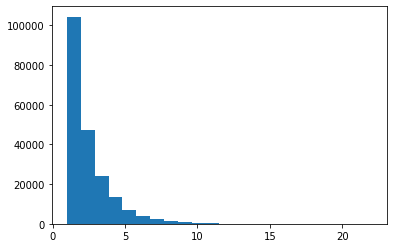

In [142]:
num_ratings = [len(v) for v in ratings_per_user_stamped.values()]
plt.hist(num_ratings, bins= max(num_ratings))

In [229]:
# 1) Predict user rating by previous x timesteps of that movie.
# If previous rating doesn't exist, return mean of that movie.

# keep track of ratings per users with rated date
# to predict rating of the user, look at the timesteps from before of that user.

def movie_window_features(stamps, window_size, mean):
    # stamps: [ [ratingID, ratedDate, Rating]]
    # if not enough window size, use mean of the movie
    features = [mean] * window_size
    for i in range(min(window_size, len(stamps))):
        features[i] = stamps[i][2]
    return features        
    
def predict_rating(ind, row, window_size):
    movie = row.MovieID
    movie_stamps = ratings_per_movie_stamped[movie]
    
    if movie in mean_per_movie.keys():
        movie_mean = mean_per_movie[movie]
    else:
        movie_mean = global_mean

    features = [movie_mean] * window_size
    rated_date = datetime.strptime(row['Rated Date'], "%Y-%m-%d")

    for i, stamp in enumerate(movie_stamps):
        if stamp[1] <= rated_date:
            features = movie_window_features(movie_stamps[i: i+n], window_size, movie_mean)
            break
    return features
        
window_size = 10

model = LinearRegression()

X_features = []

for ind, row in tqdm(X_train.iterrows(), total=X_train.shape[0]):
    X_features.append(predict_rating(ind, row, window_size))

model.fit(X_features, y_train)

# filename = "baseline5_model.pickle"
# pickle.dump(model, open(filename, 'wb')) 
# # load the model from disk
# model = pickle.load(open(filename, 'rb'))

# train score
print("Baseline 5 training MSE:", mse(y_train, model.predict(X_features)))
print("Baseline 5 training MAE:", mae(y_train, model.predict(X_features)))

100%|███████████████████████████████████████████| 423338/423338 [02:47<00:00, 2534.80it/s]


Baseline 5 training MSE: 0.7390546411207946
Baseline 5 training MAE: 0.6672864547514502


In [230]:
mse5 = []
mae5 = []
for i, (ind, row) in enumerate(tqdm(X_valid.iterrows(), total=X_valid.shape[0])):
    features = predict_rating(ind, row, window_size)
    pred = model.predict([features])
    mse5.append(mse(pred, y_valid.iloc[[i]]))
    mae5.append(mae(pred, y_valid.iloc[[i]]))

print("Baseline 5 valid MSE:", np.mean(mse5))
print("Baseline 5 valid MAE:", np.mean(mae5))

100%|███████████████████████████████████████████| 141113/141113 [01:52<00:00, 1257.39it/s]

Baseline 5 valid MSE: 1.226954132557433
Baseline 5 valid MAE: 0.8837190580624726


## Results of baseline 5

| window_size | Train MSE | Train MAE | Valid MSE | Valid MAE |
| 1 | 0.8358 | 0.7070 | 1.2561 | 0.9045 |
| 3 | 0.7541 | 0.6724 | 1.2536 | 0.8948 |
| 5 | 0.7424 | 0.6685 | 1.2386 | 0.8884 |
| 10 | 0.7390 | 0.6673 | 1.226 | 0.8837 |



In [ ]:
    
    
    
#     user = row.UserID
#     user_stamps = ratings_per_user_stamped[user]
#     print(user_stamps)
    
# y_pred5 = [predict_rating(ind, row,tresh) for ind, row in tqdm(X_valid.iterrows(), total=X_valid.shape[0], position=0)]

# mse5 = mse(y_valid, y_pred5)
# mae5 = mae(y_valid, y_pred5)
# print(f"Window size = {window_size}) baseline 5 MSE:" + str(mse5))
# print(f"Window size = {window_size}) baseline 5 MAE:" + str(mae5))

In [148]:
X_train.head()

,Unnamed: 0,MovieID,UserID,Rating,Rated Date,Released Date,Title,Released Since,show_id,month,day_of_month,year
6328647,6552913,8669,552382,4,2005-08-08,1996,Executive Decision,3507 days,s6720,08,08,2005
5754832,5858377,7509,374423,3,2003-10-22,2002,Die Another Day,659 days,s6610,10,22,2003
8914216,9177702,11781,2207196,4,2004-01-02,1984,Indiana Jones and the Temple of Doom,7306 days,s7074,01,02,2004
7484300,7747786,10231,2550125,1,2005-11-06,2004,Kung Fu Hustle,675 days,s7240,11,06,2005
373631,384234,457,1424596,5,2004-08-23,2004,Kill Bill: Vol. 2,235 days,s7199,08,23,2004


### 11/28 7:30AM - added
### Factorized Machines Models

# Baseline 6

1. 

# Testset metrics